<a href="https://colab.research.google.com/github/andrea-mar/google-trends/blob/main/googletrendsABA_MSciProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

In [ ]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /tmp/pip-req-build-t17zqgzj
  Running command git clone --filter=blob:none --quiet https://github.com/GeneralMills/pytrends /tmp/pip-req-build-t17zqgzj
  Resolved https://github.com/GeneralMills/pytrends to commit a9984ffdc9b31d853dde2ab614a77ecbf2bf33a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pytrends: filename=pytrends-4.9.2-py3-none-any.whl size=15499 sha256=ded4978fa578ad34f2ae1f1250b5b917842074598d0a536c55a53b469f6e9ace
  Stored in directory: /tmp/pip-ephem-wheel-cache-lxrou6zd/wheels/2d/b7/b3/ed99bc4c1eead02688423e0034f7e4fa0c317a250ea27304b3
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time

### Use pytrends to scrape google trends data - topic interests over the past 5 years

Pytrends documentation: https://pypi.org/project/pytrends/#interest-over-time

According to the Google Trends website <b>Interest over time (IOT)</b> = numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity of the term. A vlaue of 50 means that the term is half as popular. A score of 0 means there was not engouh data for this term. This 0 to 100 scale will be refered further as the trends index.

Each point represents the interest over time for a given week.

The region selected for the analysis is 'worldwide'.

Topic queried: 'Applied behaviour analysis'.
Date of query : 28/07/2023


In [ ]:
# pytrend = TrendReq()
# time zone codes can be found: https://forbrains.co.uk/international_tools/earth_timezones
# setting the timezone to BST does not change the results
pytrend = TrendReq(hl='en-US', tz=60, retries=2, requests_args={'verify':False})

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# # this will return different results from the the website because:
# # https://stackoverflow.com/questions/59901790/why-is-data-downloaded-via-pytrends-drastically-different-from-using-the-google
# pytrend.build_payload(kw_list=['Applied behavior analysis'], timeframe='today 5-y', geo='')

# google trends uses FREEBASE ID for topic related searches. Applied Behavior Analysis FREEBAE ID = /m/05wf1w (https://www.wikidata.org/wiki/Q621607)
# geo='' means the region is set to 'worldwide' (see pytrends documentation cited above)
pytrend.build_payload(kw_list=['/m/05wf1w'], timeframe='today 5-y' , geo ='')

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
pytrends_iot_df = pytrend.interest_over_time()
pytrends_iot_df.info()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-07-29 to 2023-07-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  261 non-null    int64
 1   isPartial  261 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB


In [ ]:
pytrends_iot_df = pytrends_iot_df.rename(columns={"/m/05wf1w": "Applied behavior analysis"})

In [ ]:
pytrends_iot_df.head()

,Applied behavior analysis,isPartial
date,,
2018-07-29,53,False
2018-08-05,54,False
2018-08-12,51,False
2018-08-19,52,False
2018-08-26,58,False


Text(0, 0.5, 'Trends Index')

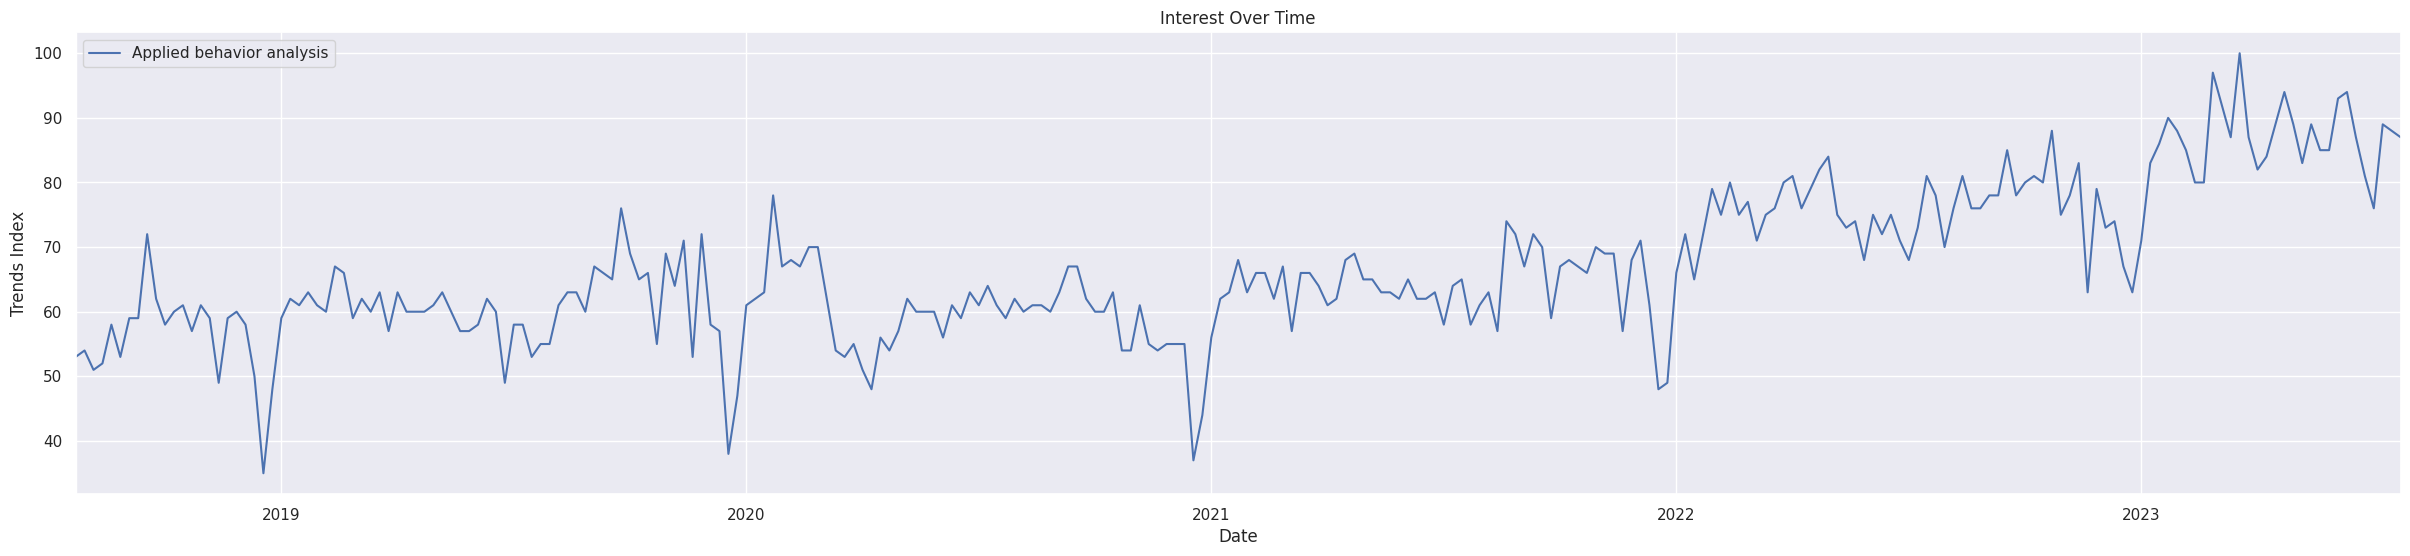

In [ ]:
# visualise IOT
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes='true')
dx = pytrends_iot_df.plot.line(figsize= (30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')

### Use Google Trends website data - topic interest over the past 5 years
The following represents the same analysis as above except the data has been manually downloaded from Google's website (https://trends.google.com/trends/explore?date=today%205-y&q=%2Fm%2F05wf1w&hl=en)

Date of query : 28/07/2023





In [ ]:
# read the data
site_df = pd.read_csv('aba_gt_global/GTweb_iot_worldwide.csv')
site_df.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [ ]:
# rename the columns with the correct lables
site_df.columns = site_df.iloc[1]
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [ ]:
# remove the first 2 rows on the data set - first row was an empty row and the second row contained the columns lables
site_df = site_df.tail(-2)
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52
5,2018-08-19,54
6,2018-08-26,60


In [ ]:
# trends index for Applied behavior analysis is stored as a string/object value
# week date is stored as a string/object value
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Week                                    261 non-null    object
 1   Applied behavior analysis: (Worldwide)  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [ ]:
# change type of Trends index for Applied behavior analysis from object to int
site_df = site_df.astype({'Applied behavior analysis: (Worldwide)':'int'})
# change the type of week date data from object to datetime
site_df['Week'] = pd.to_datetime(site_df['Week'])

In [ ]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Week                                    261 non-null    datetime64[ns]
 1   Applied behavior analysis: (Worldwide)  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


Text(0, 0.5, 'Trends Index')

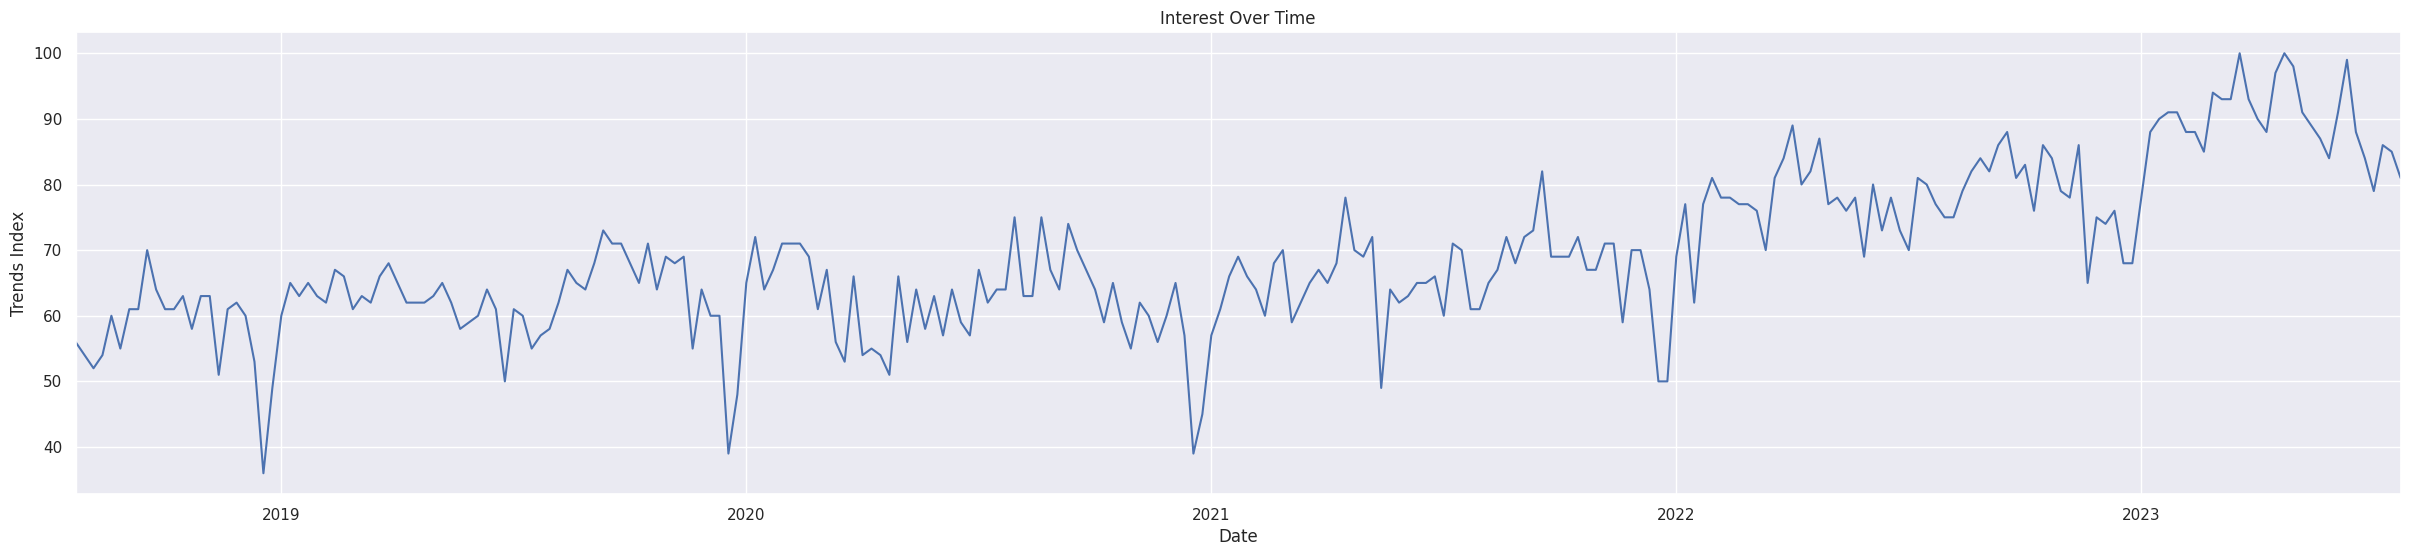

In [ ]:
# visualize IOT
site_df = site_df.set_index(site_df['Week'])
dx = site_df['Applied behavior analysis: (Worldwide)'].plot.line(figsize=(30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')

The above code shows discrepancies between the data obtained via pytrends vs. via google's official website. I have failed to find the explanation for why this is the case - apparently the data proivded when making calls as legit-user vs scraper is different (https://stackoverflow.com/questions/73988220/why-google-retrieves-different-info-to-scrapers). Google Trends does not have an official API and thus reliability on 3rd party scraping tools can result in questionalble data. I have thus decided to manually download the data from google'e website direclty - the amount of data sets is small and thus this process is faster than to try to figure out a reliable and efficient method of scraping google trends data (this is out of the scope of the current project).

## Google trends data for queries related to the topic: Applied Behaviour Analysis

Date of query : 28/07/2023
Time frame: past 5 years

Data sets obtained:
1. IOT worldwide - analysis provided above
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

5. IOT - UK
6. Interest by region (Country) UK
7. Related topics - UK
8. Related queries - UK

### Interest by region (Country) worldwide


In [ ]:
# read file -> we observe there is missing data
ibr_world_df = pd.read_csv('aba_gt_global/geoMap_global.csv')
ibr_world_df.head()

,Category: All categories
Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN


In [ ]:
# rename the columns with the correct lables
ibr_world_df.columns = ibr_world_df.iloc[0]
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN


In [ ]:
# remove first row
ibr_world_df = ibr_world_df.tail(-1)
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN
United States,26


In [ ]:
# set all NaN values to 0 (= no google trends data for that entry)
ibr_world_df['Applied behavior analysis: (7/28/18 - 7/28/23)'] = ibr_world_df['Applied behavior analysis: (7/28/18 - 7/28/23)'].fillna(0)
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,0
United States,26


In [ ]:
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Uganda to Samoa
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Applied behavior analysis: (7/28/18 - 7/28/23)  250 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [ ]:
# change type of Trends index for Applied behavior analysis from object to int
ibr_world_df = ibr_world_df.astype({'Applied behavior analysis: (7/28/18 - 7/28/23)':'int'})
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Uganda to Samoa
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Applied behavior analysis: (7/28/18 - 7/28/23)  250 non-null    int64
dtypes: int64(1)
memory usage: 3.9+ KB


In [ ]:
# sort countries/regions by trending index
ibr_world_df = ibr_world_df.sort_values(by=['Applied behavior analysis: (7/28/18 - 7/28/23)'], ascending=False)
ibr_world_df.head(10)

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
United States,26
Ethiopia,22
Italy,13
Israel,12
Brazil,12
Canada,11
United Arab Emirates,10


Applied behavior analysis seems to be very popular in Uganda and many African countries.However, the data reflects queries related to the topic, not the term, of Applied behavior analysis.
This means data reflects all possible related words, inculding misspellings and acronims. A brief investigation revealed that 2 popular companies in Uganda - one sports betting agency and one ofering financial services - have ABA in their name. This could be acounting for the incresed number of searches using the keyword 'aba' in Uganda.

Uganda 'ABA' companies: https://www.google.com/search?q=aba+uganda&oq=aba+uganda&aqs=chrome.0.69i59j46i175i199i512j0i22i30l2j0i10i22i30j0i22i30l2j69i60.3892j0j4&sourceid=chrome&ie=UTF-8

When a search in Google Trends was made for the search term 'Applied behavior analysis' (this shows just the exact match queries), USA appears to be the region where Applied behavior analysis trends the highest.

Google Trends data for 'Applied behavior analysis' as a search word:
https://trends.google.com/trends/explore?date=today%205-y&q=Applied%20behavior%20analysis&hl=en


Applied behavior analysis' popularity worldwide is not the topic of the current project so this issue will not be investigated further. Google trends data is used in the current project in order to find related key words to 'Applied behavior analysis' - > these are available in the *related queries dataset*. The related words are used to form a word bank of keywords for searching the relevant social media posts from the  Reddit platform.


### Related topics - worldwide

Accodring to Google Trends website Related topics means:

Users searching for your term also searched for these topics. You can view by the following metrics:
* Top - The most popular topics. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Related topics with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these topics are new and had few (if any) prior searches.

In [94]:
# upload data
# data is formated strangely -> see possible sollutions at https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
rt_world_df = pd.read_csv('aba_gt_global/relatedEntities_topics_global.csv', skiprows=2)
rt_world_df

,TOP
Therapy,100
Behavior,89
Analysis,55
Autistic Spectrum Disorders,24
Licensed behavior analyst,10
Master's Degree,10
Training,9
Salary,9
Psychology,9
Course,9


In [91]:
# select top 25 related topics (maximum Google Trends provided)
rt_world_df_top = rt_world_df.iloc[:25]
rt_world_df_top = rt_world_df_top.reset_index()
rt_world_df_top = rt_world_df_top.rename(columns={"index": "Top related topic", "TOP": "Trend index"})
rt_world_df_top.head()

,Top related topic,Trend index
0,Therapy,100
1,Behavior,89
2,Analysis,55
3,Autistic Spectrum Disorders,24
4,Licensed behavior analyst,10


In [93]:
# select rising related topics
rt_world_df_rising = rt_world_df.iloc[25:]
rt_world_df_rising = rt_world_df_rising.reset_index()
rt_world_df_rising = rt_world_df_rising.rename(columns={"index": "Rising related topic", "TOP": "Trend index"})
rt_world_df_rising = rt_world_df_rising.tail(-1)
rt_world_df_rising.head()

,Rising related topic,Trend index
1,Autism,Breakout
2,Functional behavior assessment,Breakout
3,Applied science,"+2,450%"
4,Postgraduate education,+200%
5,Therapist,+180%


The data above shows Applied behaviour analysis is commonly related to Therapy and Autistic Spectrum Disorders (see TOP: rt_world_df_top).

It seems that recently there has been a high increase in queries on Autism and Applied behaviour analysis (see RISING: rt_world_df_rising)

### Related queries - worldwide

Accodring to Google Trends website Related queries means:

Users searching for your term also searched for these queries. You can sort by the following metrics:
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* Rising - Queries with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these queries are new and had few (if any) prior searches.



In [ ]:
# read data
rq_world_df = pd.read_csv('aba_gt_global/relatedQueries_search_global.csv', skiprows=2)
# select top 25 related queries/words ( this is the maximum Google Trends provided)
rq_world_df_top = rq_world_df.iloc[:25]
rq_world_df_top = rq_world_df_top.reset_index()
rq_world_df_top.head()

,index,TOP
0,aba,100
1,aba therapy,22
2,behavior analysis,10
3,autism,6
4,what is aba,6


In [ ]:
# rename the columns appropriately
rq_world_df_top = rq_world_df_top.rename(columns={"index": "Top related query word", "TOP": "Trend index"})
rq_world_df_top.head()

,Top related query word,Trend index
0,aba,100
1,aba therapy,22
2,behavior analysis,10
3,autism,6
4,what is aba,6


In [101]:
# select the rising related queries/words
rq_world_df_rising = rq_world_df.iloc[25:]
rq_world_df_rising = rq_world_df_rising.reset_index()
rq_world_df_rising.head()

,index,TOP
0,RISING,NaN
1,golden steps aba,Breakout
2,ababet ug,Breakout
3,ababet,"+4,750%"
4,aba desk login,"+4,100%"


In [102]:
# rename the columns appropriately
rq_world_df_rising = rq_world_df_rising.rename(columns={"index": "Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_world_df_rising = rq_world_df_rising.tail(-1)
rq_world_df_rising.head()

,Rising related query word,search increase
1,golden steps aba,Breakout
2,ababet ug,Breakout
3,ababet,"+4,750%"
4,aba desk login,"+4,100%"
5,the three branches of the science of behavior ...,"+3,350%"


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Applied behavior anlysis'.

The 2 data bases representig global data:
- rq_world_df_rising
- rq_world_df_top

### IOT - UK

In [ ]:
iot_uk_df = pd.read_csv('aba_gt_uk/GTweb_iot_UK.csv')
iot_uk_df.head()

### Interest by region (Country) UK

In [ ]:
ibr_uk_df = pd.read_csv('aba_gt_uk/geoMap_UK.csv')
ibr_uk_df.head()

### Related topics - UK

In [ ]:
rt_uk_df = pd.read_csv('aba_gt_uk/relatedEntities_topics_UK.csv', skiprows=2)
rt_uk_df.head()

### Related queries - UK

In [ ]:
rq_uk_df = pd.read_csv('aba_gt_uk/relatedQueries_search_UK.csv', skiprows=2)
rq_uk_df.head()